In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [9]:
data = [[10,20,30,40],[15,25,35,45],[5,10,15,20],[2,6,8,12]]
cols = ['a','b','c','d']
df = pd.DataFrame(data,columns=cols,index=['m1','m2','m3','m4'])

In [11]:
df.head()

,a,b,c,d
m1,10,20,30,40
m2,15,25,35,45
m3,5,10,15,20
m4,2,6,8,12


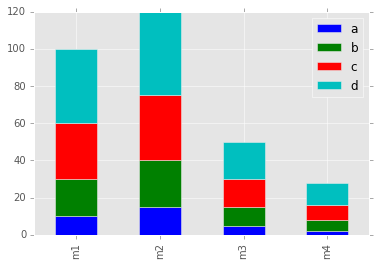

In [24]:
df.plot(kind='bar',stacked=True)

In [19]:
ser1 = pd.Series([10,20,30,40],index=cols)
ser2 = pd.Series([0.5,0.75,0.3,0.1],index=cols)

In [20]:
df_from_series = pd.DataFrame([ser1,ser2])

In [21]:
df_from_series

,a,b,c,d
0,10.0,20.00,30.0,40.0
1,0.5,0.75,0.3,0.1


In [25]:
price = pd.Series(np.random.randn(150).cumsum(),index=pd.date_range('2000-1-1', periods=150, freq='B'))